In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [4]:
tf.__version__

'2.11.0'

# Download dataset

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [9]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

# Preparing data

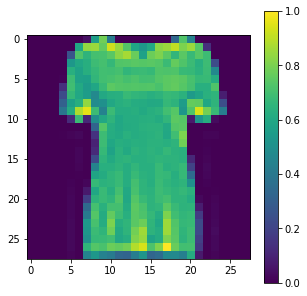

In [15]:
plt.figure(figsize=(5, 5))
plt.imshow(x_train[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
x_train = x_train / 255.
x_test = x_test / 255.

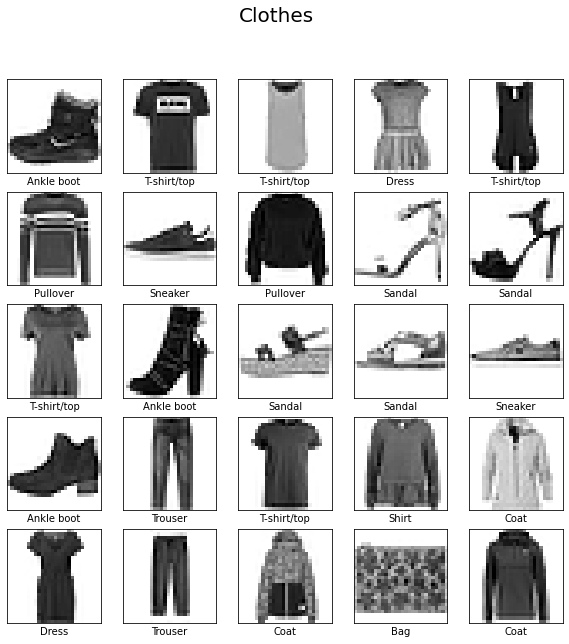

In [20]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Clothes', fontsize=20)
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

# Create Model

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5012 - accuracy: 0.8231
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3777 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3389 - accuracy: 0.8752
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3151 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2954 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2798 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2657 - accuracy: 0.9021
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2541 - accuracy: 0.9059
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2449 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.234

# Evaluate model

In [24]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3557 - accuracy: 0.8753 - 703ms/epoch - 2ms/step

Test accuracy: 0.8752999901771545


# Prediction

In [25]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [26]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [27]:
predictions[0]

array([4.3505281e-08, 3.9145013e-07, 3.7689252e-09, 5.1037169e-08,
       4.7604978e-09, 5.3288881e-04, 3.2530147e-06, 8.1469845e-03,
       2.0170909e-09, 9.9131632e-01], dtype=float32)

In [28]:
np.argmax(predictions[0])

9

In [29]:
y_test[0]

9

In [30]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

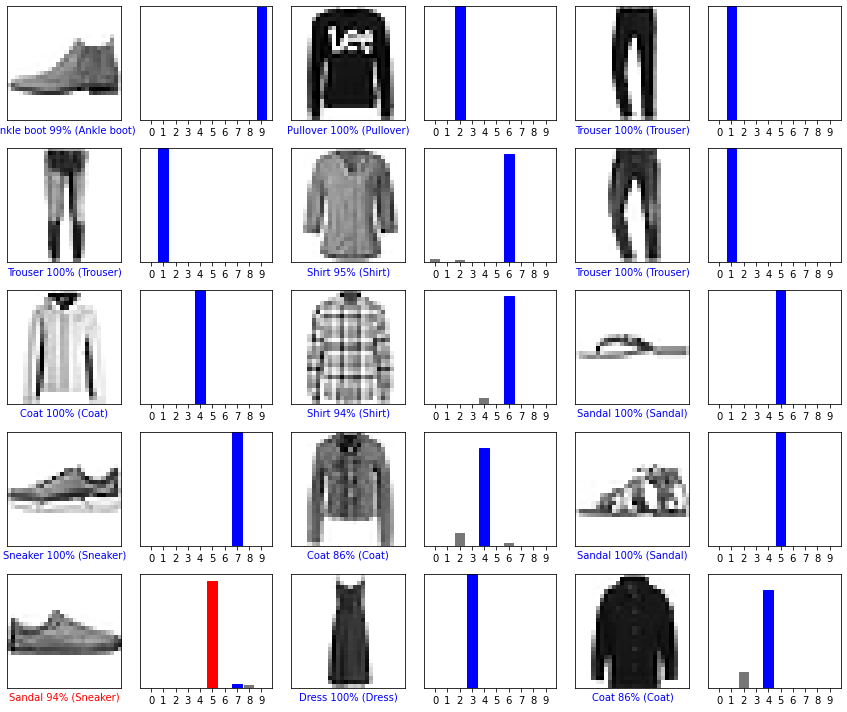

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

# Use model

In [35]:
img = x_test[1]

print(img.shape)

(28, 28)


In [36]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [37]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 40ms/step
[[4.5177912e-05 1.0636640e-13 9.9939418e-01 1.0970078e-09 1.3716033e-04
  2.8521770e-12 4.2348437e-04 1.5937887e-16 2.0711772e-12 5.9627398e-16]]


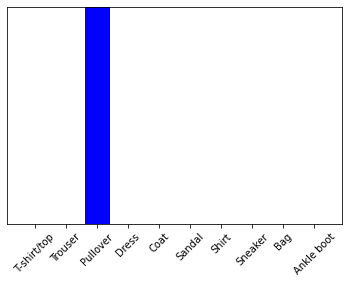

In [38]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [39]:
np.argmax(predictions_single[0])

2